<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/venn_0710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagrammi di Venn nella Teoria della Probabilità

I **diagrammi di Venn** sono uno strumento grafico che permette di visualizzare le relazioni tra insiemi o eventi. In particolare, nella teoria della probabilità vengono usati per rappresentare in modo intuitivo eventi e operazioni insiemistiche come **unione**, **intersezione**, **complemento** e **differenza**.

Un diagramma di Venn consiste in cerchi che rappresentano eventi. La loro disposizione, sovrapposizione e relazione reciproca mostrano le interazioni tra gli eventi.

### Come si Usano i Diagrammi di Venn

Consideriamo tre eventi $\mathcal{A}$, $\mathcal{B}$ e $\mathcal{C}$, che sono rappresentati da tre cerchi distinti. Ecco come vengono rappresentate alcune operazioni fondamentali:

- **Unione** ($\mathcal{A} \cup \mathcal{B}$): l'area che copre entrambi i cerchi $\mathcal{A}$ e $\mathcal{B}$ rappresenta l'unione, cioè tutti gli esiti che appartengono a **$\mathcal{A}$ o $\mathcal{B}$** (o entrambi).
  
- **Intersezione** ($\mathcal{A} \cap \mathcal{B}$): l'area di sovrapposizione tra $\mathcal{A}$ e $\mathcal{B}$ rappresenta l'intersezione, cioè tutti gli esiti che appartengono a **entrambi** gli eventi.

- **Complemento** ($\mathcal{A}^c$): è l'area **fuori** dal cerchio $\mathcal{A}$, che rappresenta tutti gli esiti che **non** appartengono all'evento $\mathcal{A}$.

- **Differenza** ($\mathcal{A} \setminus \mathcal{B}$): l'area all'interno di $\mathcal{A}$ ma **esclusa** dalla sovrapposizione con $\mathcal{B}$ rappresenta gli esiti che appartengono a $\mathcal{A}$ ma **non** a $\mathcal{B}$.

I diagrammi di Venn sono utili per comprendere visivamente concetti come l'indipendenza degli eventi, la mutua esclusione e la probabilità condizionata.


### Codice Python per Generare un Diagramma di Venn

Possiamo usare Python per generare un diagramma di Venn per tre eventi $\mathcal{A}$, $\mathcal{B}$ e $\mathcal{C}$ usando la libreria `matplotlib_venn` in diversi modi, uno è specificando il numero degli esiti per ogni evento, usando il metodo  `venn3` :


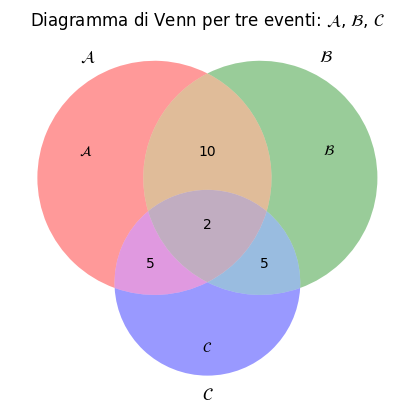

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Dati per i tre eventi A, B e C
# Formato: (solo A, solo B, solo C, A∩B, A∩C, B∩C, A∩B∩C)
venn_data = (10, 10, 10, 5, 5, 5, 2)

# Creazione del diagramma di Venn
venn = venn3(subsets=venn_data, set_labels=(r'$\mathcal{A}$', r'$\mathcal{B}$', r'$\mathcal{C}$'))

# Modifica delle etichette per utilizzare LaTeX
venn.get_label_by_id('100').set_text(r'$\mathcal{A}$')
venn.get_label_by_id('010').set_text(r'$\mathcal{B}$')
venn.get_label_by_id('001').set_text(r'$\mathcal{C}$')

# Titolo del grafico
plt.title(r"Diagramma di Venn per tre eventi: $\mathcal{A}$, $\mathcal{B}$, $\mathcal{C}$")

# Mostra il diagramma
plt.show()

In questo caso:

1. **Libreria**: Il codice utilizza la libreria `matplotlib_venn` per creare diagrammi di Venn. Puoi installarla usando `pip install matplotlib-venn`.
  
2. **Dati**: I dati per il diagramma sono forniti in una tupla. Gli elementi della tupla rappresentano il numero di elementi nelle varie sezioni del diagramma:
    
  - `10` per gli esiti che appartengono solo a $\mathcal{A}$.
    
  - `10` per gli esiti che appartengono solo a $\mathcal{B}$.
  
  - `10` per gli esiti che appartengono solo a $\mathcal{C}$.
  
  - `5` per gli esiti che appartengono a $\mathcal{A} \cap \mathcal{B}$.
  
  - `5` per gli esiti che appartengono a $\mathcal{A} \cap \mathcal{C}$.
  
  - `5` per gli esiti che appartengono a $\mathcal{B} \cap \mathcal{C}$.
  
  - `2` per gli esiti che appartengono a $\mathcal{A} \cap \mathcal{B} \cap \mathcal{C}$.

3. **Diagramma**: Il metodo `venn3` genera un diagramma per tre eventi.

Puoi modificare i dati per vedere come cambia la rappresentazione degli eventi nel diagramma di Venn.

Un altra forma, più focalizzata sulla probabilità, è attraverso la seguente funzione:

In [35]:
from matplotlib_venn import venn2
import matplotlib.patches as patches

def plot_venn_diagram_union(p_a, p_b, p_intersection):
  """
  Plots a Venn diagram representing the union of two events A and B.

  Args:
    p_a: Probability of event A.
    p_b: Probability of event B.
    p_intersection: Probability of the intersection of A and B (A ∩ B).
  """

  p_union = p_a + p_b - p_intersection

  venn2(subsets=(
      round(p_a - p_intersection,1),
      round(p_b - p_intersection,1),
      round(p_intersection,1)),
        set_labels=(r'$\mathcal{A}$', r'$\mathcal{B}$'))

  plt.title('Venn Diagram of Events A and B')
  plt.show()

Questa funzione accetta come input tre argomenti:
- `p_a`: la probabilità dell'evento $\mathcal{A}$.
- `p_b`: la probabilità dell'evento $\mathcal{B}$.
- `p_intersection`: la probabilità dell'intersezione tra $\mathcal{A}$ e $\mathcal{B}$, cioè $\mathcal{A} \cap \mathcal{B}$. Vedremo più avanti come calcolarla ;)

La funzione quindi genera un **diagramma di Venn** per visualizzare l'unione dei due eventi e mostra graficamente le aree che rappresentano $\mathcal{A}$, $\mathcal{B}$ e la loro intersezione.

Per calcolare le diverse probabilità, questa funzione utilizza delle proprietà che vedremo a continuazione.

La funzione `venn2` prende come argomento un vettore `subsets`, che rappresenta le aree dei due cerchi corrispondenti agli eventi $\mathcal{A}$ e $\mathcal{B}$. Useremo questa funzione per guidare le nostre spiegazioni più avanti in questa dispensa.

# Le probabilità degli eventi:
____________



- Abbiamo visto che, quando gli esiti di un esperimento aleatorio sono equiprobabili, la probabilità può essere intesa  come un rapporto tra casi -o esiti- favorevoli  e casi -o esiti- totali (definizione classica della probabilità).
- Se gli esiti non fossero equiprobabili, allora la probabilità corrisponderebbe alla frequenza di occorrenza di ogni esito in un insieme vasto di simulazioni (definizione frequentista).

> In ogni caso, una volta definite le probabilità degli esiti, abbiamo visto che la probabilità di un evento corrisponde alla somma delle singole probabilità degli esiti che sono contenuti in quell'evento.

## Operazioni Insiemistiche nella Teoria della Probabilità

Nella teoria della probabilità, un **evento** è rappresentato come un **sottoinsieme** dello spazio degli eventi, denotato generalmente con $\Omega$. Le operazioni tra insiemi corrispondono ad operazioni tra eventi, ecco le principali:


### 1. Intersezione di Eventi
L'intersezione di due eventi $\mathcal{A}$ e $\mathcal{B}$, denotata come $\mathcal{A} \cap \mathcal{B}$, rappresenta l'evento che contiene solo gli esiti che appartengono (_contemporaneamente_) **sia a** $\mathcal{A}$ **che a** $\mathcal{B}$:

$$
\mathcal{A} \cap \mathcal{B} = \{ \omega \mid \omega \in \mathcal{A} \wedge \omega \in \mathcal{B} \}
$$

Nel contesto della probabilità, diciamo che si verifica $\mathcal{A} \cap \mathcal{B}$ quando si verifica un esito che appartiene **ad entrambi** gli eventi $\mathcal{A}$ e $\mathcal{B}$. La probabilità di questo evento verrà denotata così:

$$
P(\mathcal{A} \cap \mathcal{B})
$$

Vedremo più avanti che, se $\mathcal{A}$ e $\mathcal{B}$ sono eventi **indipendenti**, allora la probabilità della loro intersezione è:

$$
P(\mathcal{A} \cap \mathcal{B}) = P(\mathcal{A}) P(\mathcal{B})
$$

(per eventi indipendenti, la probabilità che entrambi si verifichino è il prodotto delle loro probabilità di ogni evento.)


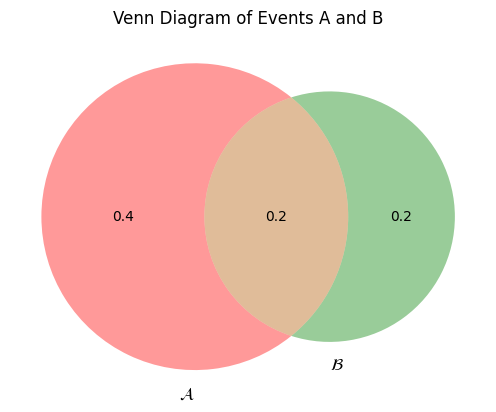

Probabilità di A = 0.6
Probatilità di B = 0.4
Probabilità di A intersecato B = 0.2


In [26]:
plot_venn_diagram_union(p_a=0.6, p_b=0.4, p_intersection=0.2)
print('Probabilità di A = 0.6')
print('Probatilità di B = 0.4')
print('Probabilità di A intersecato B = 0.2')

### 2. Evento Complementare

Dato uno spazio campionario $\Omega$ e un evento $A \subseteq \Omega$, l'**evento complementare** di $\mathcal{A}$, indicato con $\mathcal{A}^c$ oppure $\overline{\mathcal{A}}$, è definito come l'insieme di tutti gli esiti dello spazio campionario **che non appartengono** ad $\mathcal{A}$.

Formalmente:

$$\mathcal{A}^c = \{\omega \in \Omega : \omega \notin \mathcal{A}\}$$

#### Proprietà fondamentali

1. $(\mathcal{A}^c)^c = \mathcal{A}$
2. $\mathcal{A} \cup \mathcal{A}^c = \Omega$
3. $\mathcal{A}A \cap \mathcal{A}^c = \emptyset$
4. $P(\mathcal{A}^c) = 1 - P(\mathcal{A})$

#### Esempio

Se lanciamo un dado a sei facce e definiamo l'evento $\mathcal{A}$ come "esce un numero pari", allora:

- $\mathcal{A} = \{2, 4, 6\}$
- \mathcal{A}^c = \{1, 3, 5\}$

In questo caso, abbiamo che $P(\mathcal{A}) = \frac{3}{6} = \frac{1}{2}$ e $P(\mathcal{A}^c) = \frac{3}{6} = \frac{1}{2}$

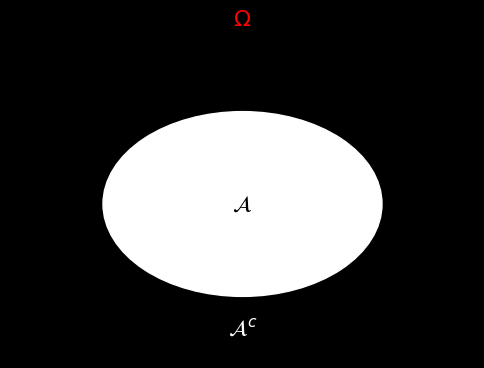

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(6, 4))

# Black rectangle
rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='black')
ax.add_patch(rect)

# White circle
circle = patches.Circle((0.5, 0.5), 0.3, linewidth=1, edgecolor='white', facecolor='white')
ax.add_patch(circle)

# Add labels
ax.text(0.5, 0.5, r'$\mathcal{A}$', ha='center', va='center', color='black', fontsize=16)
ax.text(0.5, 0.1, r'$\mathcal{A}^c$', ha='center', va='center', color='white', fontsize=16)
ax.text(0.5, 1.1, r'$\Omega$', ha='center', va='center', color='red', fontsize=16)


# Remove axes and set background color
ax.axis('off')
fig.patch.set_facecolor('black')

plt.show()


###  3. Unione di Eventi
L'unione di due eventi $\mathcal{A}$ e $\mathcal{B}$, denotata come $\mathcal{A} \cup \mathcal{B}$, rappresenta l'evento che contiene tutti gli esiti sia di $\mathcal{A}$ che di $\mathcal{B}$:

$$\mathcal{A} \cup \mathcal{B} = \{ \omega | \omega \in \mathcal{A} \vee x \in \mathcal{B} \}$$

Nel contesto della probabilità, avremmo che si verifica $\mathcal{A} \cup \mathcal{B}$ quando si verifica un esito contenuto in **almeno uno** degli eventi  $\mathcal{A}$ o $\mathcal{B}$. Non sará difficile renderci conto che vale la seguente uguaglianza per la probabilità:

$$
P(\mathcal{A} \cup \mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B}) - P(\mathcal{A} \cap \mathcal{B})
$$

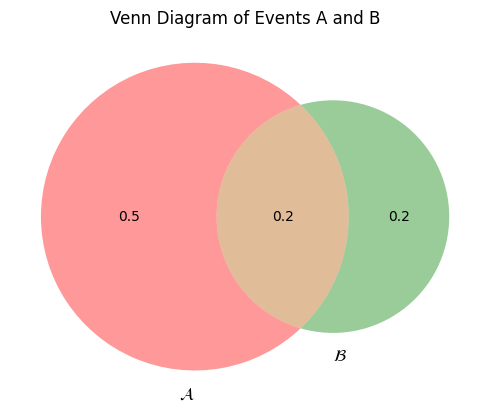

Probabilità di A = 0.7
Probatilità di B = 0.4
Probabilità di A intersecato B = 0.2
Probabilità di A unione B = 0.7 + 0.4 - 0.2 = 0.9


In [25]:
plot_venn_diagram_union(p_a=0.7, p_b=0.4, p_intersection=0.2)
print('Probabilità di A = 0.7')
print('Probatilità di B = 0.4')
print('Probabilità di A intersecato B = 0.2')
print('Probabilità di A unione B = 0.7 + 0.4 - 0.2 = 0.9')


#### Caso degli eventi *mutuamente esclusivi*
Due eventi $\mathcal{A}$ e $\mathcal{B}$ sono mutuamente esclusivi  se non possono verificarsi contemporaneamente, cioè, se corrispondono ad insieme disgiunti di esiti, cioè $
\mathcal{A} \cap \mathcal{B} = \emptyset
$.

In questo caso, la probabilità dell'unione è:

$$
P(\mathcal{A} \cup \mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B})
$$

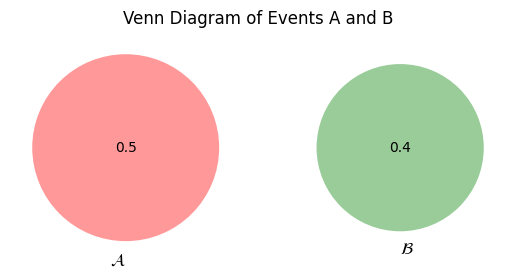

Probabilità di A = 0.5
Probatilità di B = 0.4
Probabilità di A intersecato B = 0
Probabilità di A unione B = 0.5 + 0.4 - 0 = 0.9


In [24]:
plot_venn_diagram_union(p_a=0.5, p_b=0.4, p_intersection=0.0)
print('Probabilità di A = 0.5')
print('Probatilità di B = 0.4')
print('Probabilità di A intersecato B = 0')
print('Probabilità di A unione B = 0.5 + 0.4 - 0 = 0.9')

### 4. Differenza tra Eventi
La differenza tra due eventi $\mathcal{A}$ e $\mathcal{B}$, denotata come $\mathcal{A} \setminus \mathcal{B}$, rappresenta l'evento che contiene tutti gli esiti che appartengono ad $\mathcal{A}$ **ma non** a $\mathcal{B}$:

$$
\mathcal{A} \setminus \mathcal{B} = \{ \omega \mid \omega \in \mathcal{A} \wedge \omega \notin \mathcal{B} \}
$$

Nel contesto della probabilità, si verifica $\mathcal{A} \setminus \mathcal{B}$ quando l'esito appartiene all'evento $\mathcal{A}$ ma **non** all'evento $\mathcal{B}$. La probabilità di questo evento sarà data da:

$$
P(\mathcal{A} \setminus \mathcal{B}) = P(\mathcal{A}) - P(\mathcal{A} \cap \mathcal{B})
$$

Questa formula riflette il fatto che stiamo sottraendo dalla probabilità di $\mathcal{A}$ gli esiti che appartengono anche a $\mathcal{B}$, cioè l'intersezione tra $\mathcal{A}$ e $\mathcal{B}$.

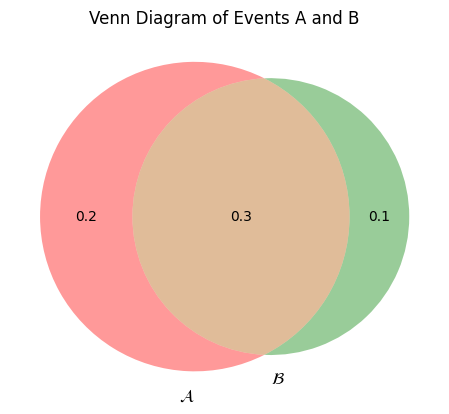

Probabilità di A = 0.5
Probatilità di B = 0.4
Probabilità di A intersecato B = 0.3
Probabilità di A meno B = 0.5 - 0.3 = 0.2


In [27]:
plot_venn_diagram_union(p_a=0.5, p_b=0.4, p_intersection=0.3)
print('Probabilità di A = 0.5')
print('Probatilità di B = 0.4')
print('Probabilità di A intersecato B = 0.3')
print('Probabilità di A meno B = 0.5 - 0.3 = 0.2')